In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
data2 = pd.read_csv('test.csv')
data2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [5]:
data2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [7]:
data.duplicated().sum()

0

In [8]:
data2.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data.isnull().sum().sum()

7829

In [11]:
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(strategy='most_frequent')

C_columns = data.select_dtypes(include=['int64']).columns

data[C_columns] = imp_mode.fit_transform(data[C_columns])

In [12]:
C_columns = data.select_dtypes(include='float64').columns

data[C_columns] = imp_mode.fit_transform(data[C_columns])

In [13]:
C_columns = data2.select_dtypes(include=['int64']).columns

data2[C_columns] = imp_mode.fit_transform(data2[C_columns])

In [14]:
C_columns = data2.select_dtypes(include=['float64']).columns

data2[C_columns] = imp_mode.fit_transform(data2[C_columns])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

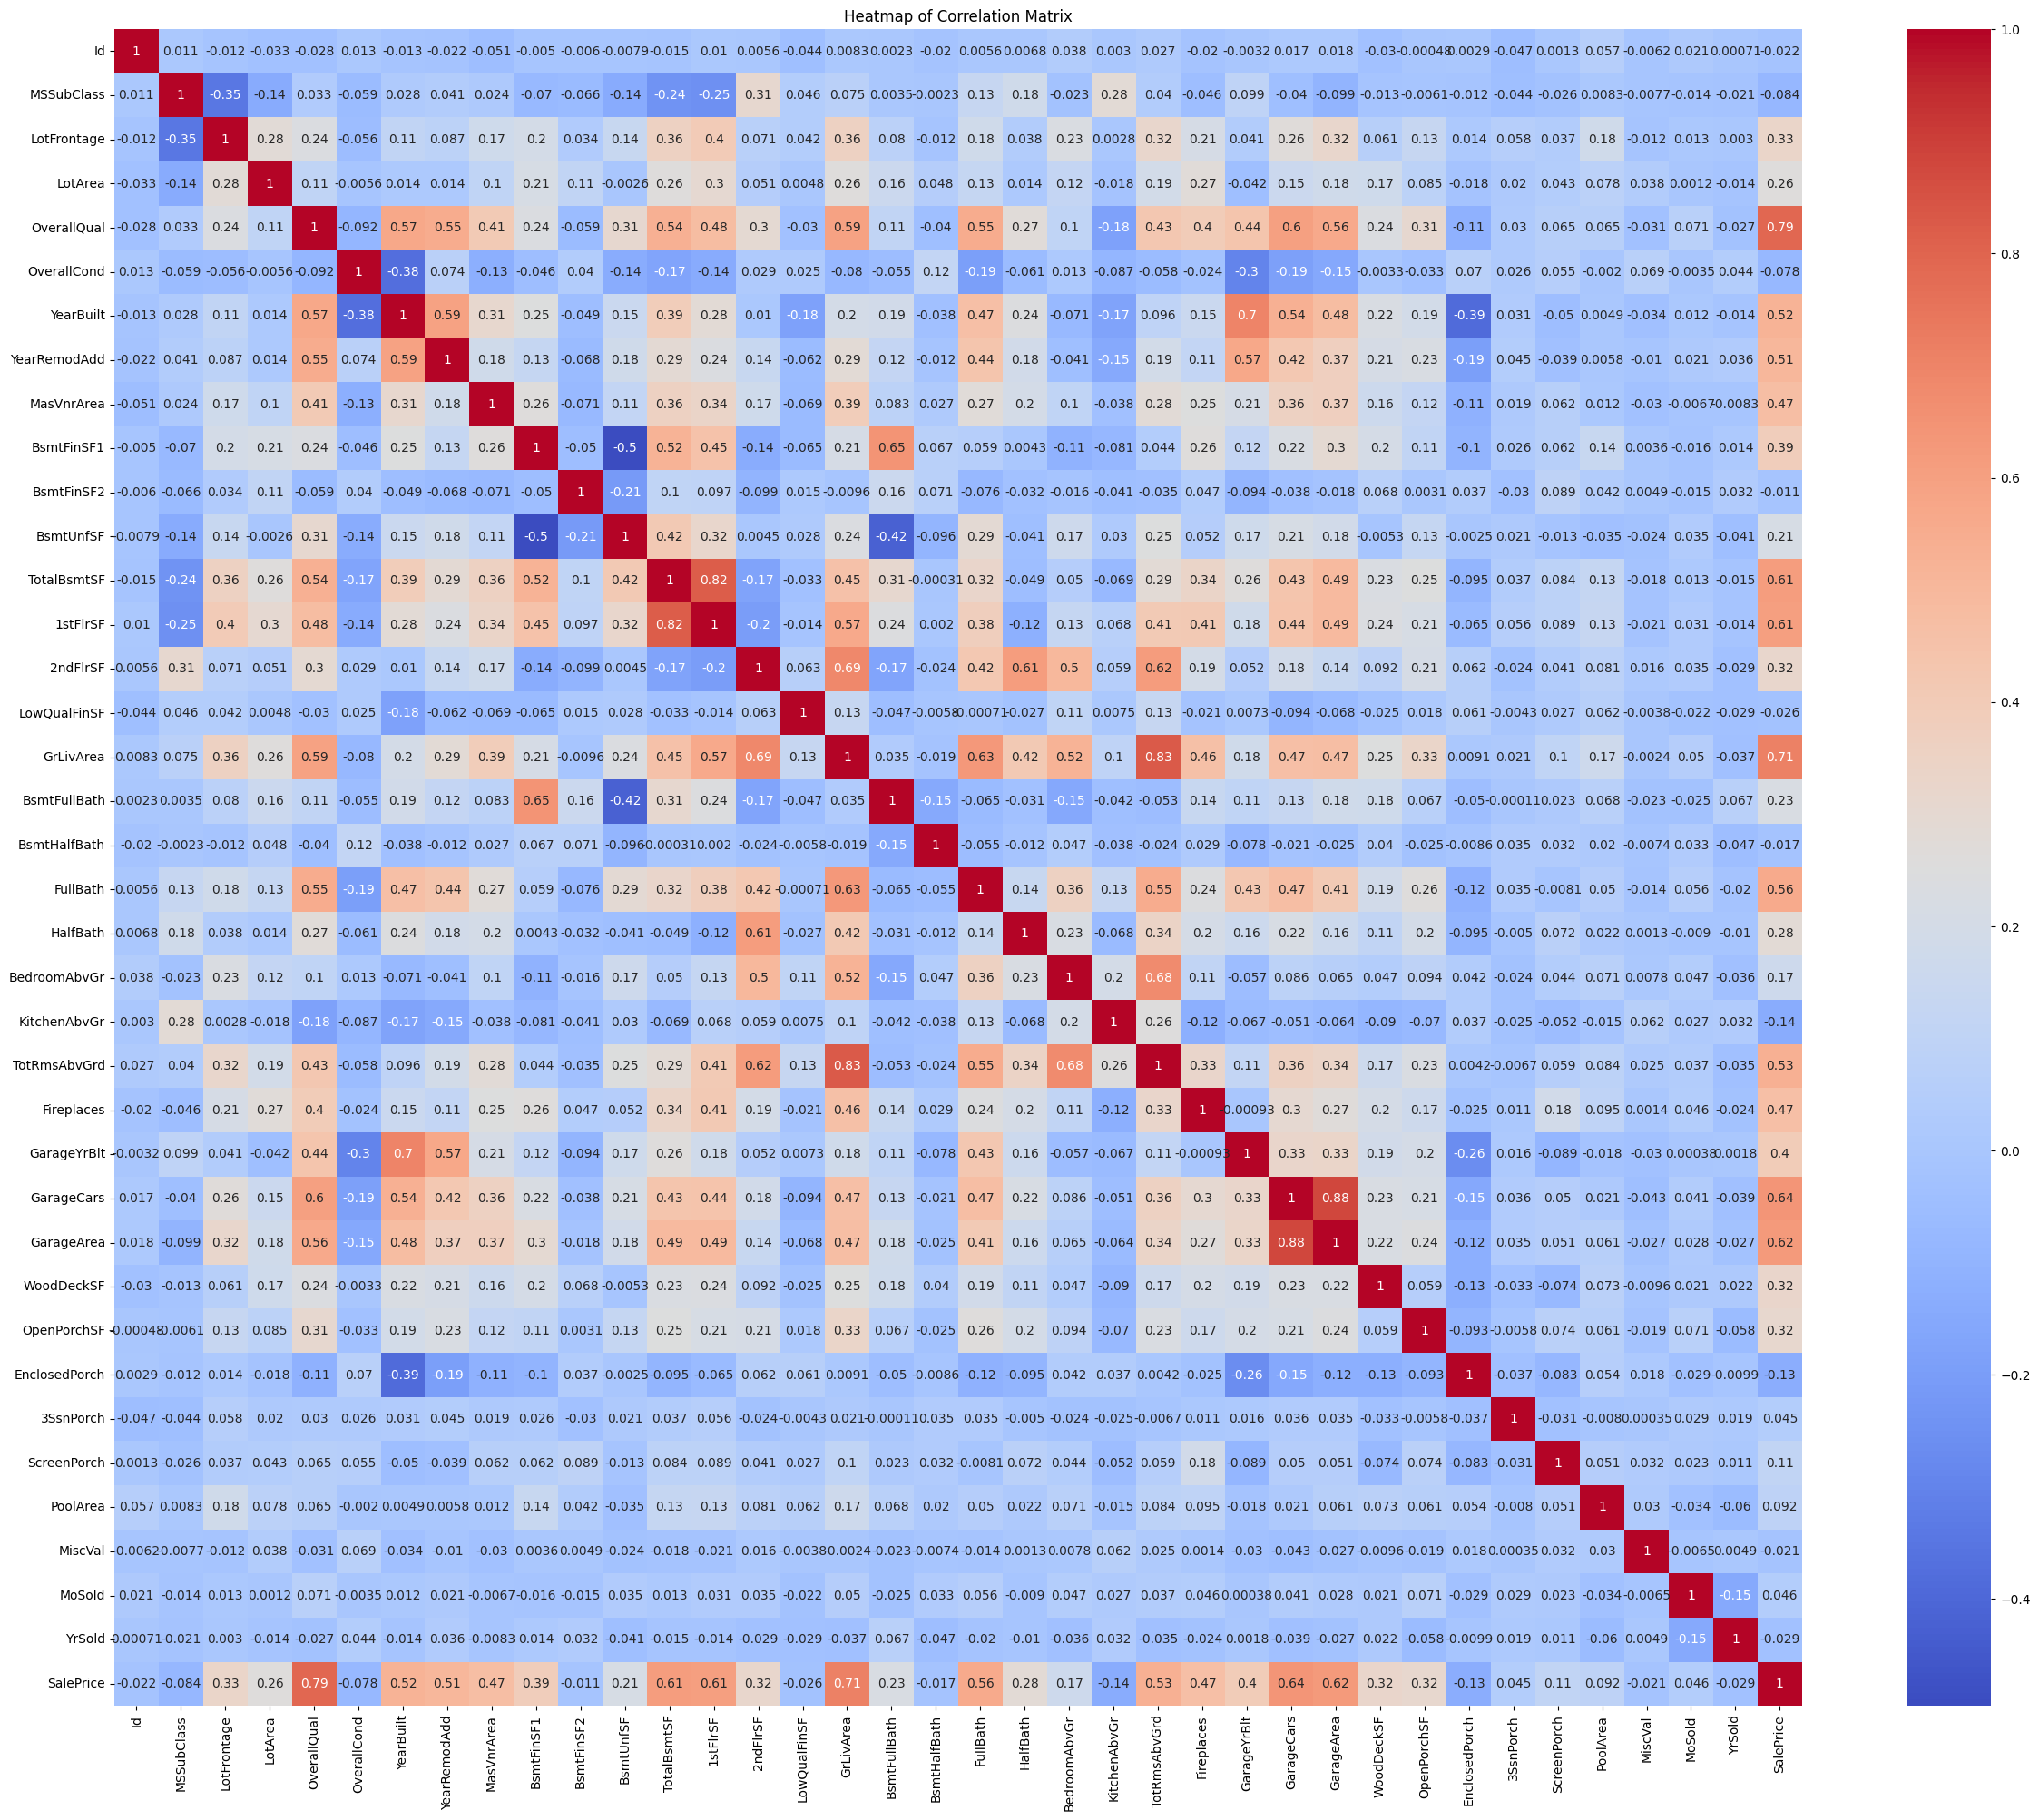

In [16]:
numerical_data = data.select_dtypes(include=['int64','float64'])

corr = numerical_data.corr()
plt.figure(figsize=(30, 24))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [17]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
c = ['LotArea','GarageCars','WoodDeckSF','TotalBsmtSF','YearRemodAdd', 'MiscVal','MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF','BsmtHalfBath', 'HalfBath', 'YrSold', 'PoolArea','EnclosedPorch']
data.drop(columns=c,inplace=True)
data2.drop(columns=c,inplace=True)

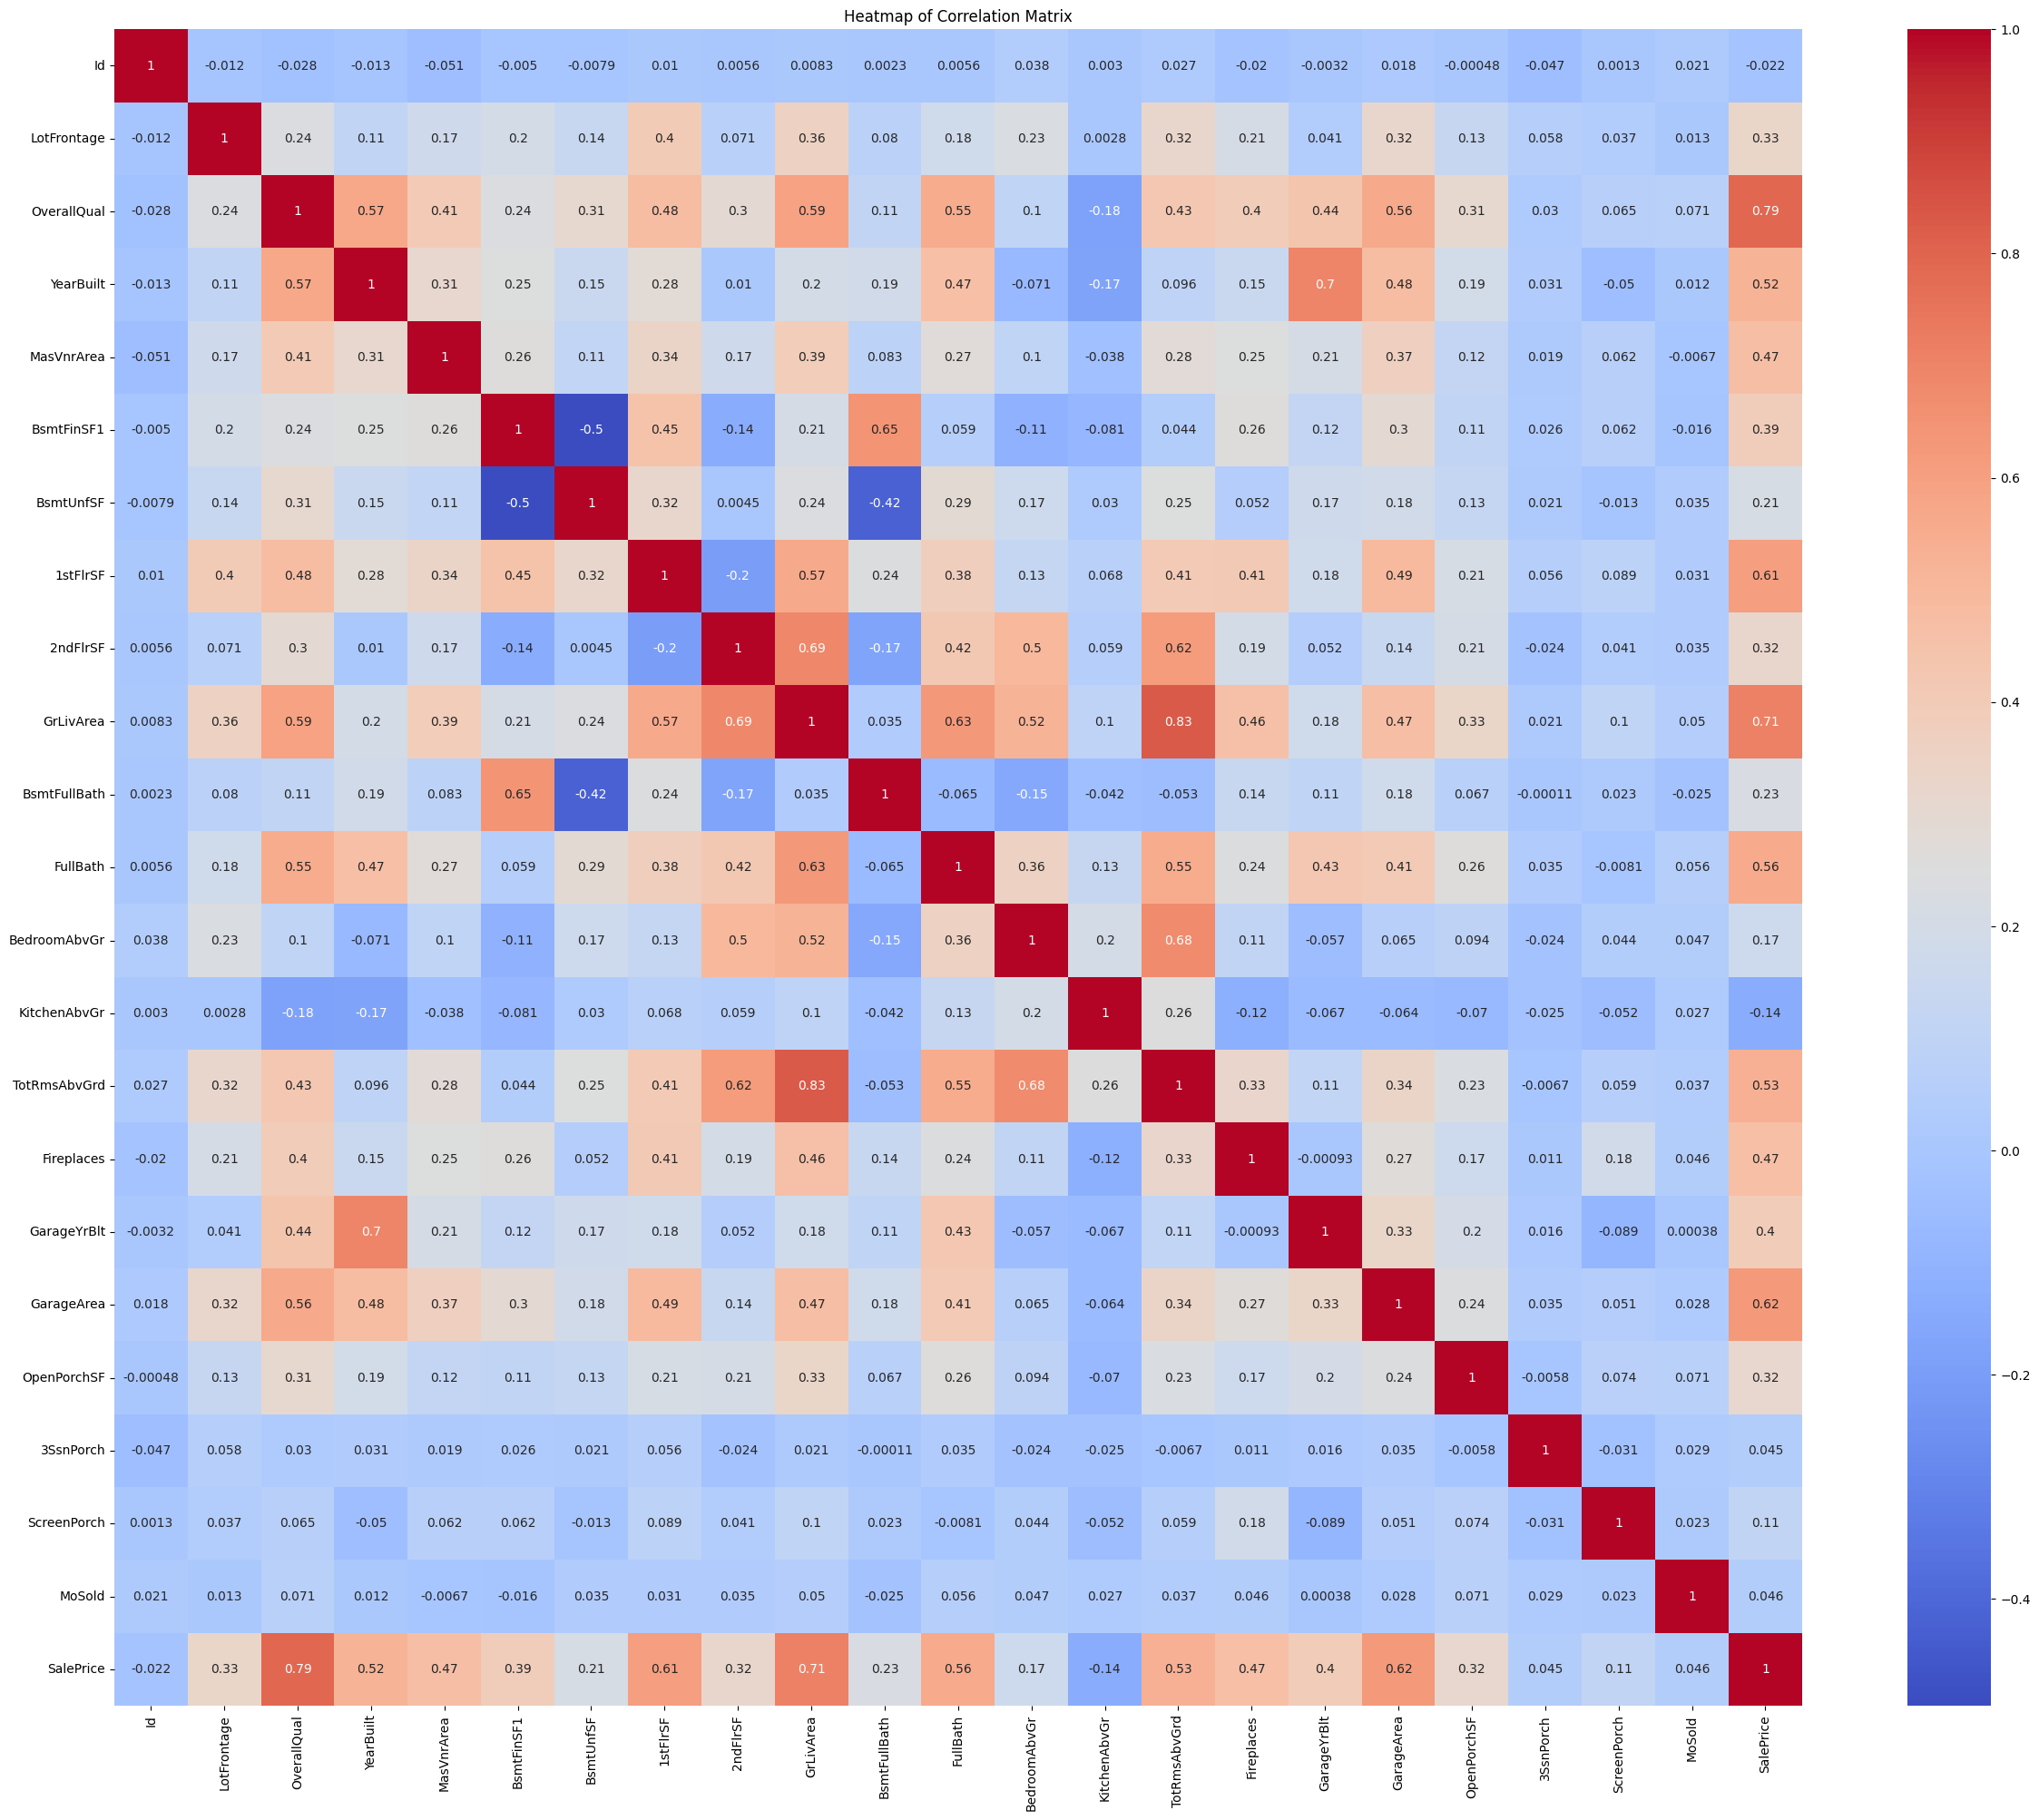

In [19]:
numerical_data = data.select_dtypes(include=['int64','float64'])

corr = numerical_data.corr()
plt.figure(figsize=(30, 24))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [20]:
c = ['BsmtUnfSF','2ndFlrSF', 'BsmtFullBath','BedroomAbvGr', 'KitchenAbvGr','3SsnPorch', 'ScreenPorch', 'MoSold','GarageYrBlt','OpenPorchSF','BsmtFinSF1','LotFrontage']
data.drop(columns=c,inplace=True)
data2.drop(columns=c,inplace=True)

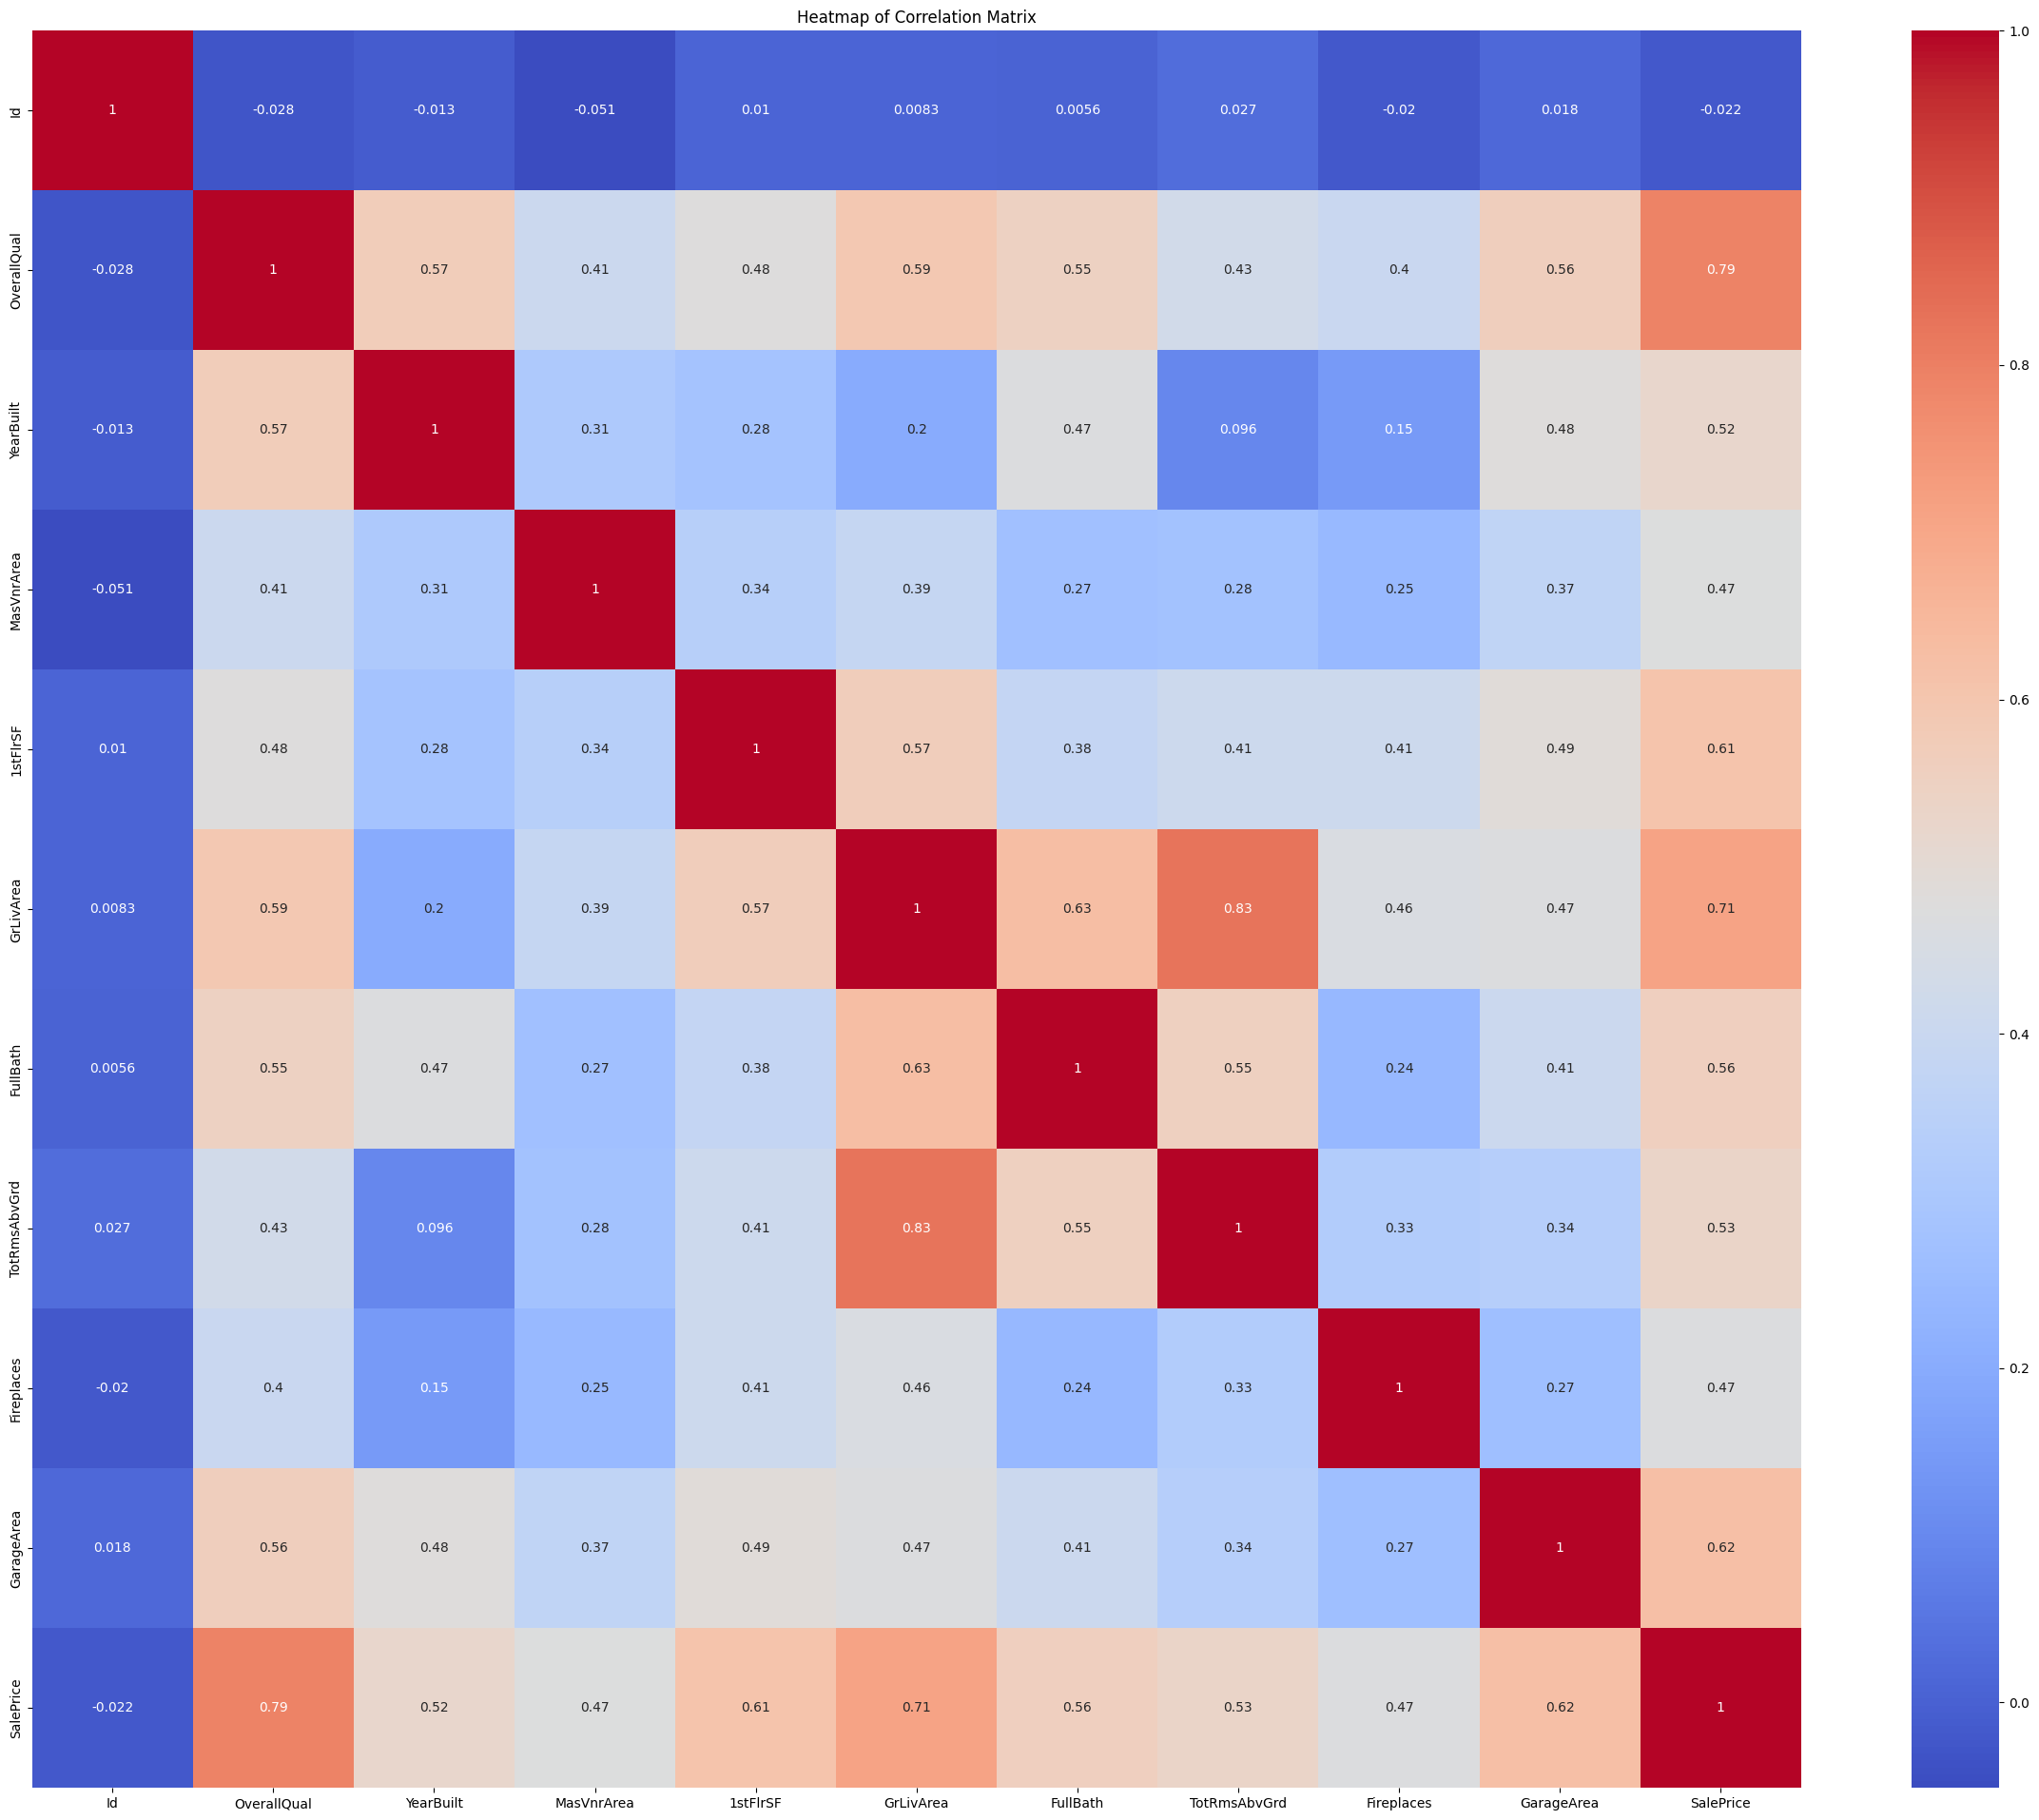

In [21]:
numerical_data = data.select_dtypes(include=['int64','float64'])

corr = numerical_data.corr()
plt.figure(figsize=(30, 24))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [22]:
data.describe(include='object').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [23]:
# data['Exterior1st','Exterior2nd','Neighborhood']

freq = ['Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','CentralAir','Utilities','Heating','BsmtFinType2','BsmtCond','ExterCond','RoofMatl','RoofStyle','Condition2','BldgType','Condition1','LandSlope','LotConfig','LandContour','Street','MSZoning']

data.drop(columns=freq,inplace=True)
data2.drop(columns=freq,inplace=True)

In [24]:
non_C = ['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu','MasVnrType']

data.drop(columns=non_C,inplace=True)
data2.drop(columns=non_C,inplace=True)

In [25]:
# columnsObj = ['Street','Utilities','CentralAir']

# data = pd.get_dummies(data,columns=columnsObj)
columnsObj = data.select_dtypes(include='object')
columnsObj

LotShape Neighborhood HouseStyle Exterior1st Exterior2nd ExterQual  \
0         Reg      CollgCr     2Story     VinylSd     VinylSd        Gd   
1         Reg      Veenker     1Story     MetalSd     MetalSd        TA   
2         IR1      CollgCr     2Story     VinylSd     VinylSd        Gd   
3         IR1      Crawfor     2Story     Wd Sdng     Wd Shng        TA   
4         IR1      NoRidge     2Story     VinylSd     VinylSd        Gd   
...       ...          ...        ...         ...         ...       ...   
1455      Reg      Gilbert     2Story     VinylSd     VinylSd        TA   
1456      Reg       NWAmes     1Story     Plywood     Plywood        TA   
1457      Reg      Crawfor     2Story     CemntBd     CmentBd        Ex   
1458      Reg        NAmes     1Story     MetalSd     MetalSd        TA   
1459      Reg      Edwards     1Story     HdBoard     HdBoard        Gd   

     Foundation BsmtQual BsmtExposure BsmtFinType1 HeatingQC KitchenQual  \
0         PConc       Gd           No          GLQ        Ex          Gd   
1        CBlock       Gd           Gd          ALQ        Ex          TA   
2         PConc       Gd           Mn          GLQ        Ex          Gd   
3        BrkTil       TA           No          ALQ        Gd          Gd   
4         PConc       Gd           Av          GLQ        Ex          Gd   
...         ...      ...          ...          ...       ...         ...   
1455      PConc       Gd           No          Unf        Ex          TA   
1456     CBlock       Gd           No          ALQ        TA          TA   
1457      Stone       TA           No          GLQ        Ex          Gd   
1458     CBlock       TA           Mn          GLQ        Gd          Gd   
1459     CBlock       TA           No          BLQ        Gd          TA   

     GarageType GarageFinish  
0        Attchd          RFn  
1        Attchd          RFn  
2        Attchd          RFn  
3        Detchd          Unf  
4        Attchd          RFn  
...         ...          ...  
1455     Attchd          RFn  
1456     Attchd          Unf  
1457     Attchd          RFn  
1458     Attchd          Unf  
1459     Attchd          Fin  

[1460 rows x 14 columns]

In [26]:
columnsObj = data.select_dtypes(include='object')

label = LabelEncoder()

for col in columnsObj:
    data[col] = label.fit_transform(data[col])

In [27]:
columnsObj = data2.select_dtypes(include='object')

label = LabelEncoder()

for col in columnsObj:
    data2[col] = label.fit_transform(data2[col])

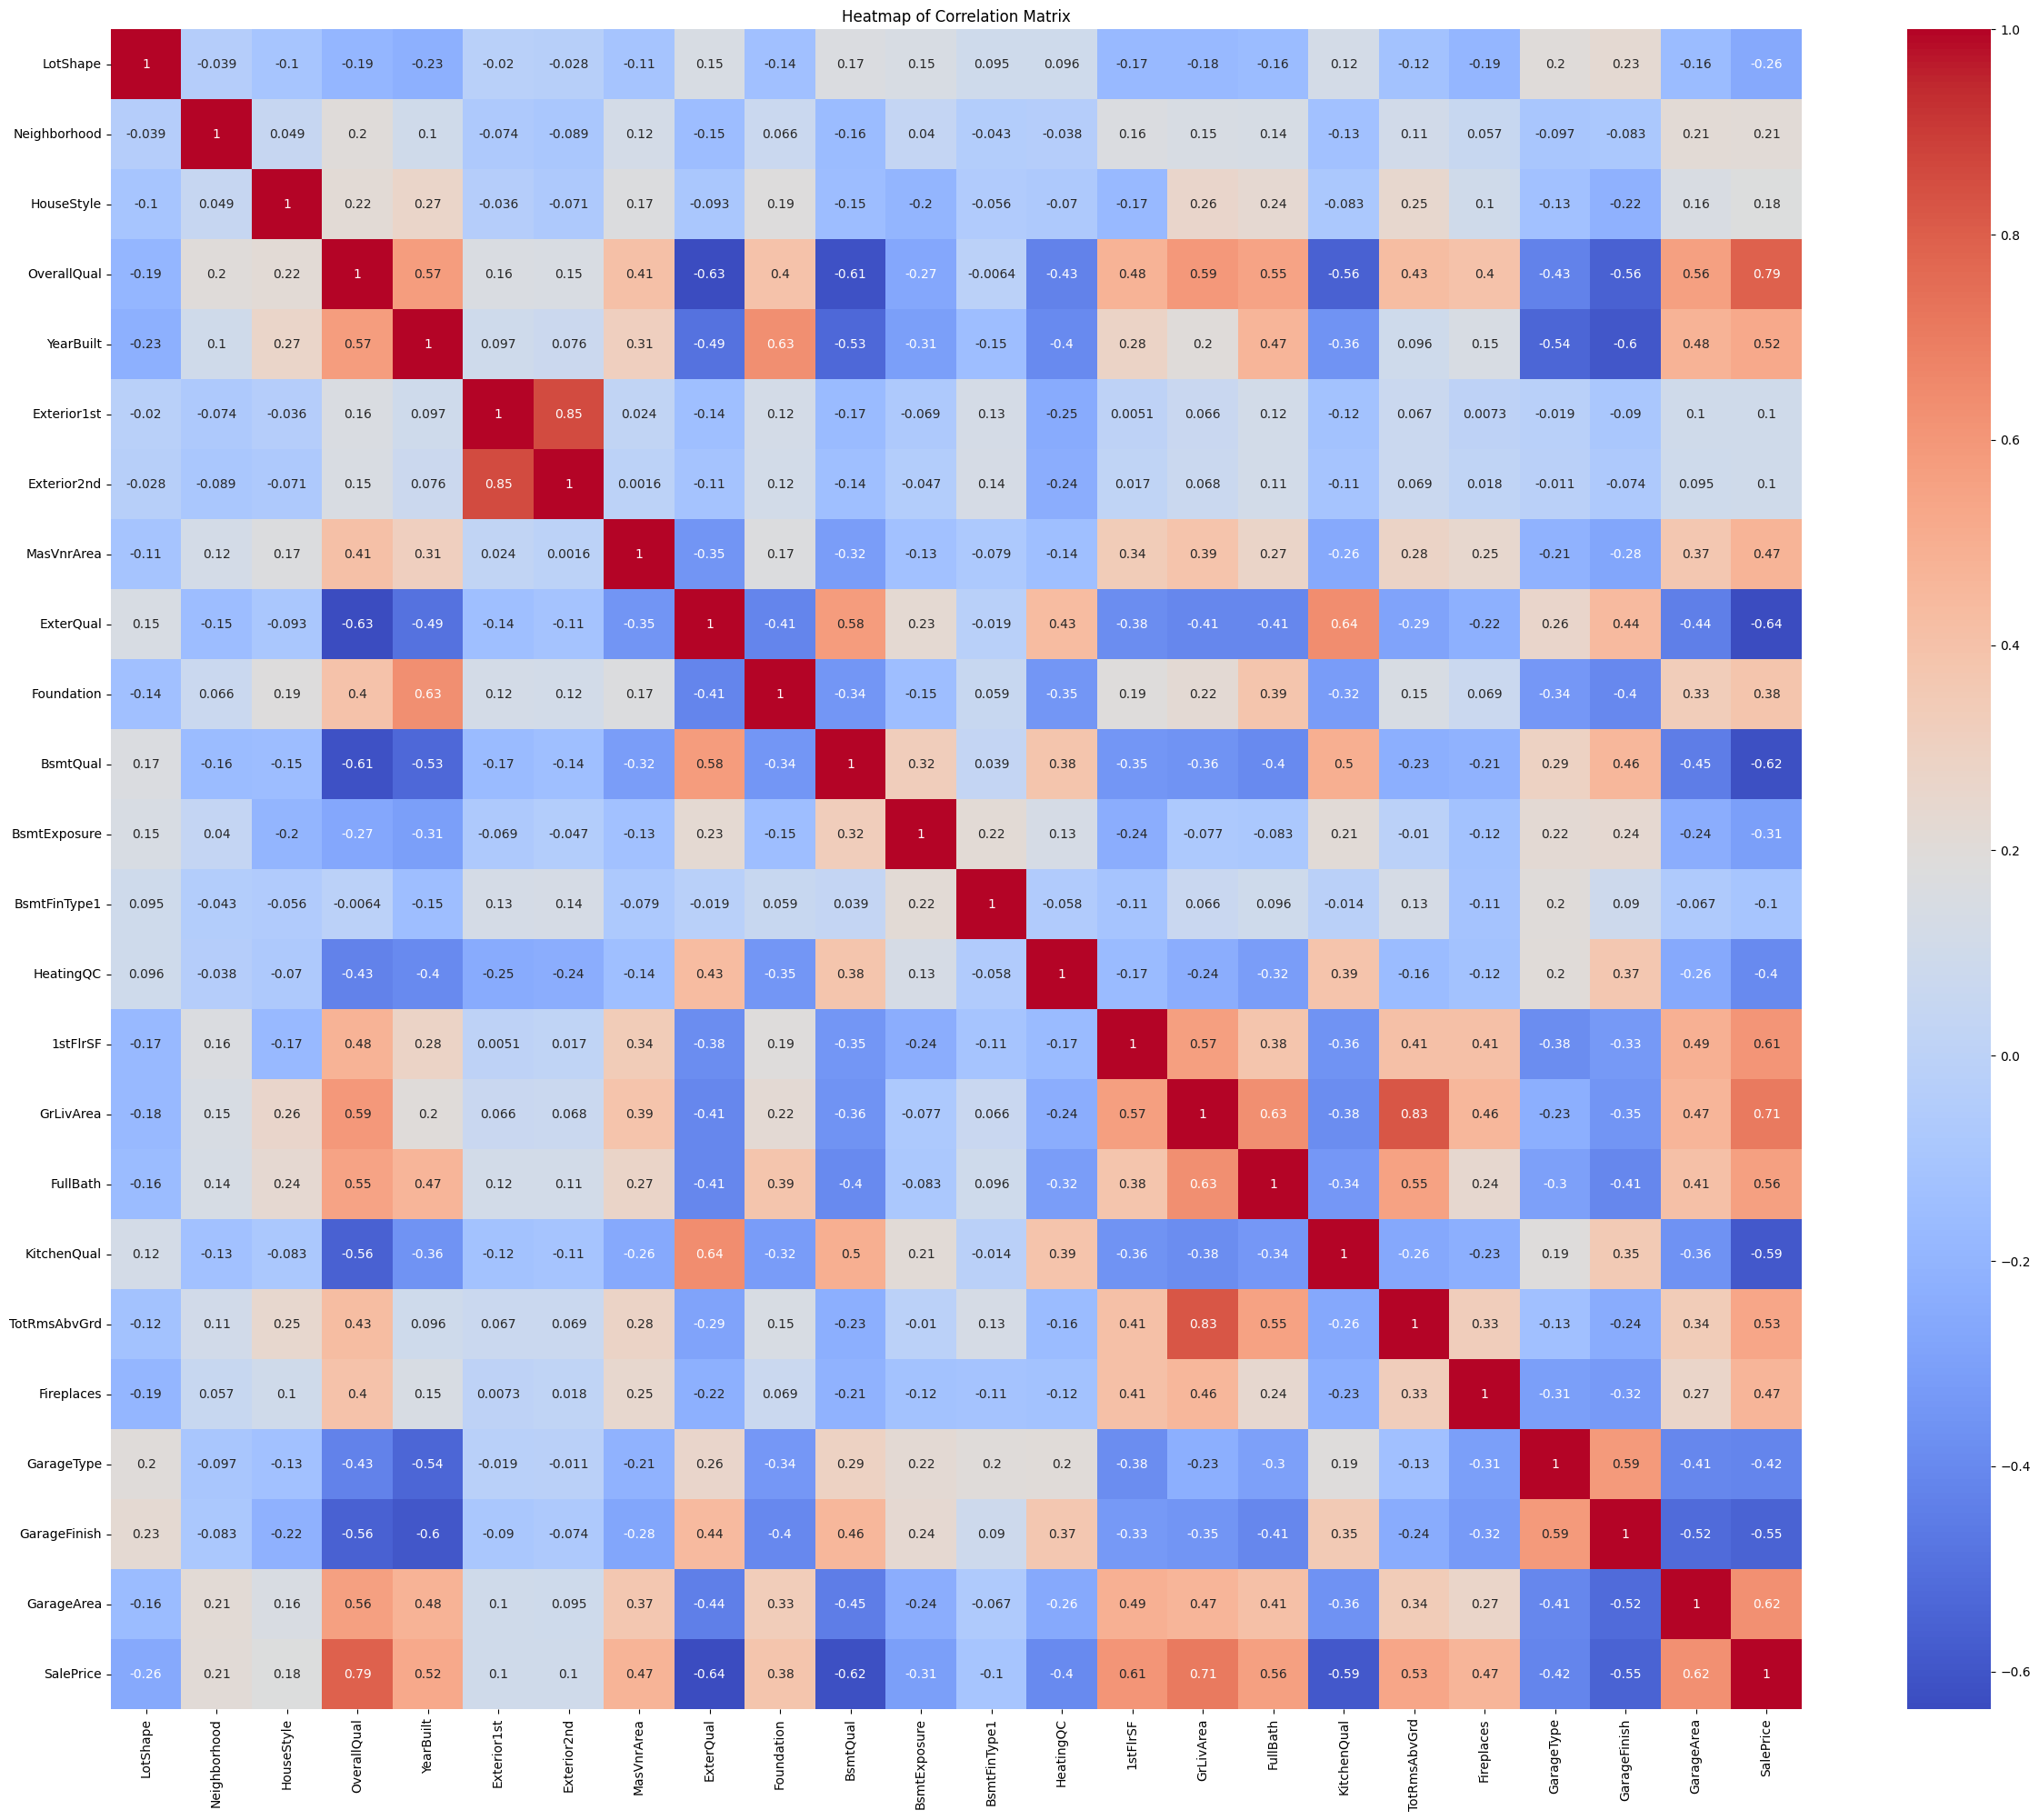

In [28]:
numerical_data = data.select_dtypes(include=['int64','float64'])

corr = numerical_data.corr()
plt.figure(figsize=(30, 24))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [29]:
data.columns

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageArea', 'SalePrice'],
      dtype='object')

In [30]:
drop_C = ['LotShape','Neighborhood','HouseStyle','Exterior1st', 'Exterior2nd', 'BsmtExposure', 'BsmtFinType1' , 'HeatingQC','GarageType']

data.drop(columns=drop_C,inplace=True)
data2.drop(columns=drop_C,inplace=True)


In [31]:
data.columns

Index(['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [32]:
data2.columns

Index(['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageArea'],
      dtype='object')

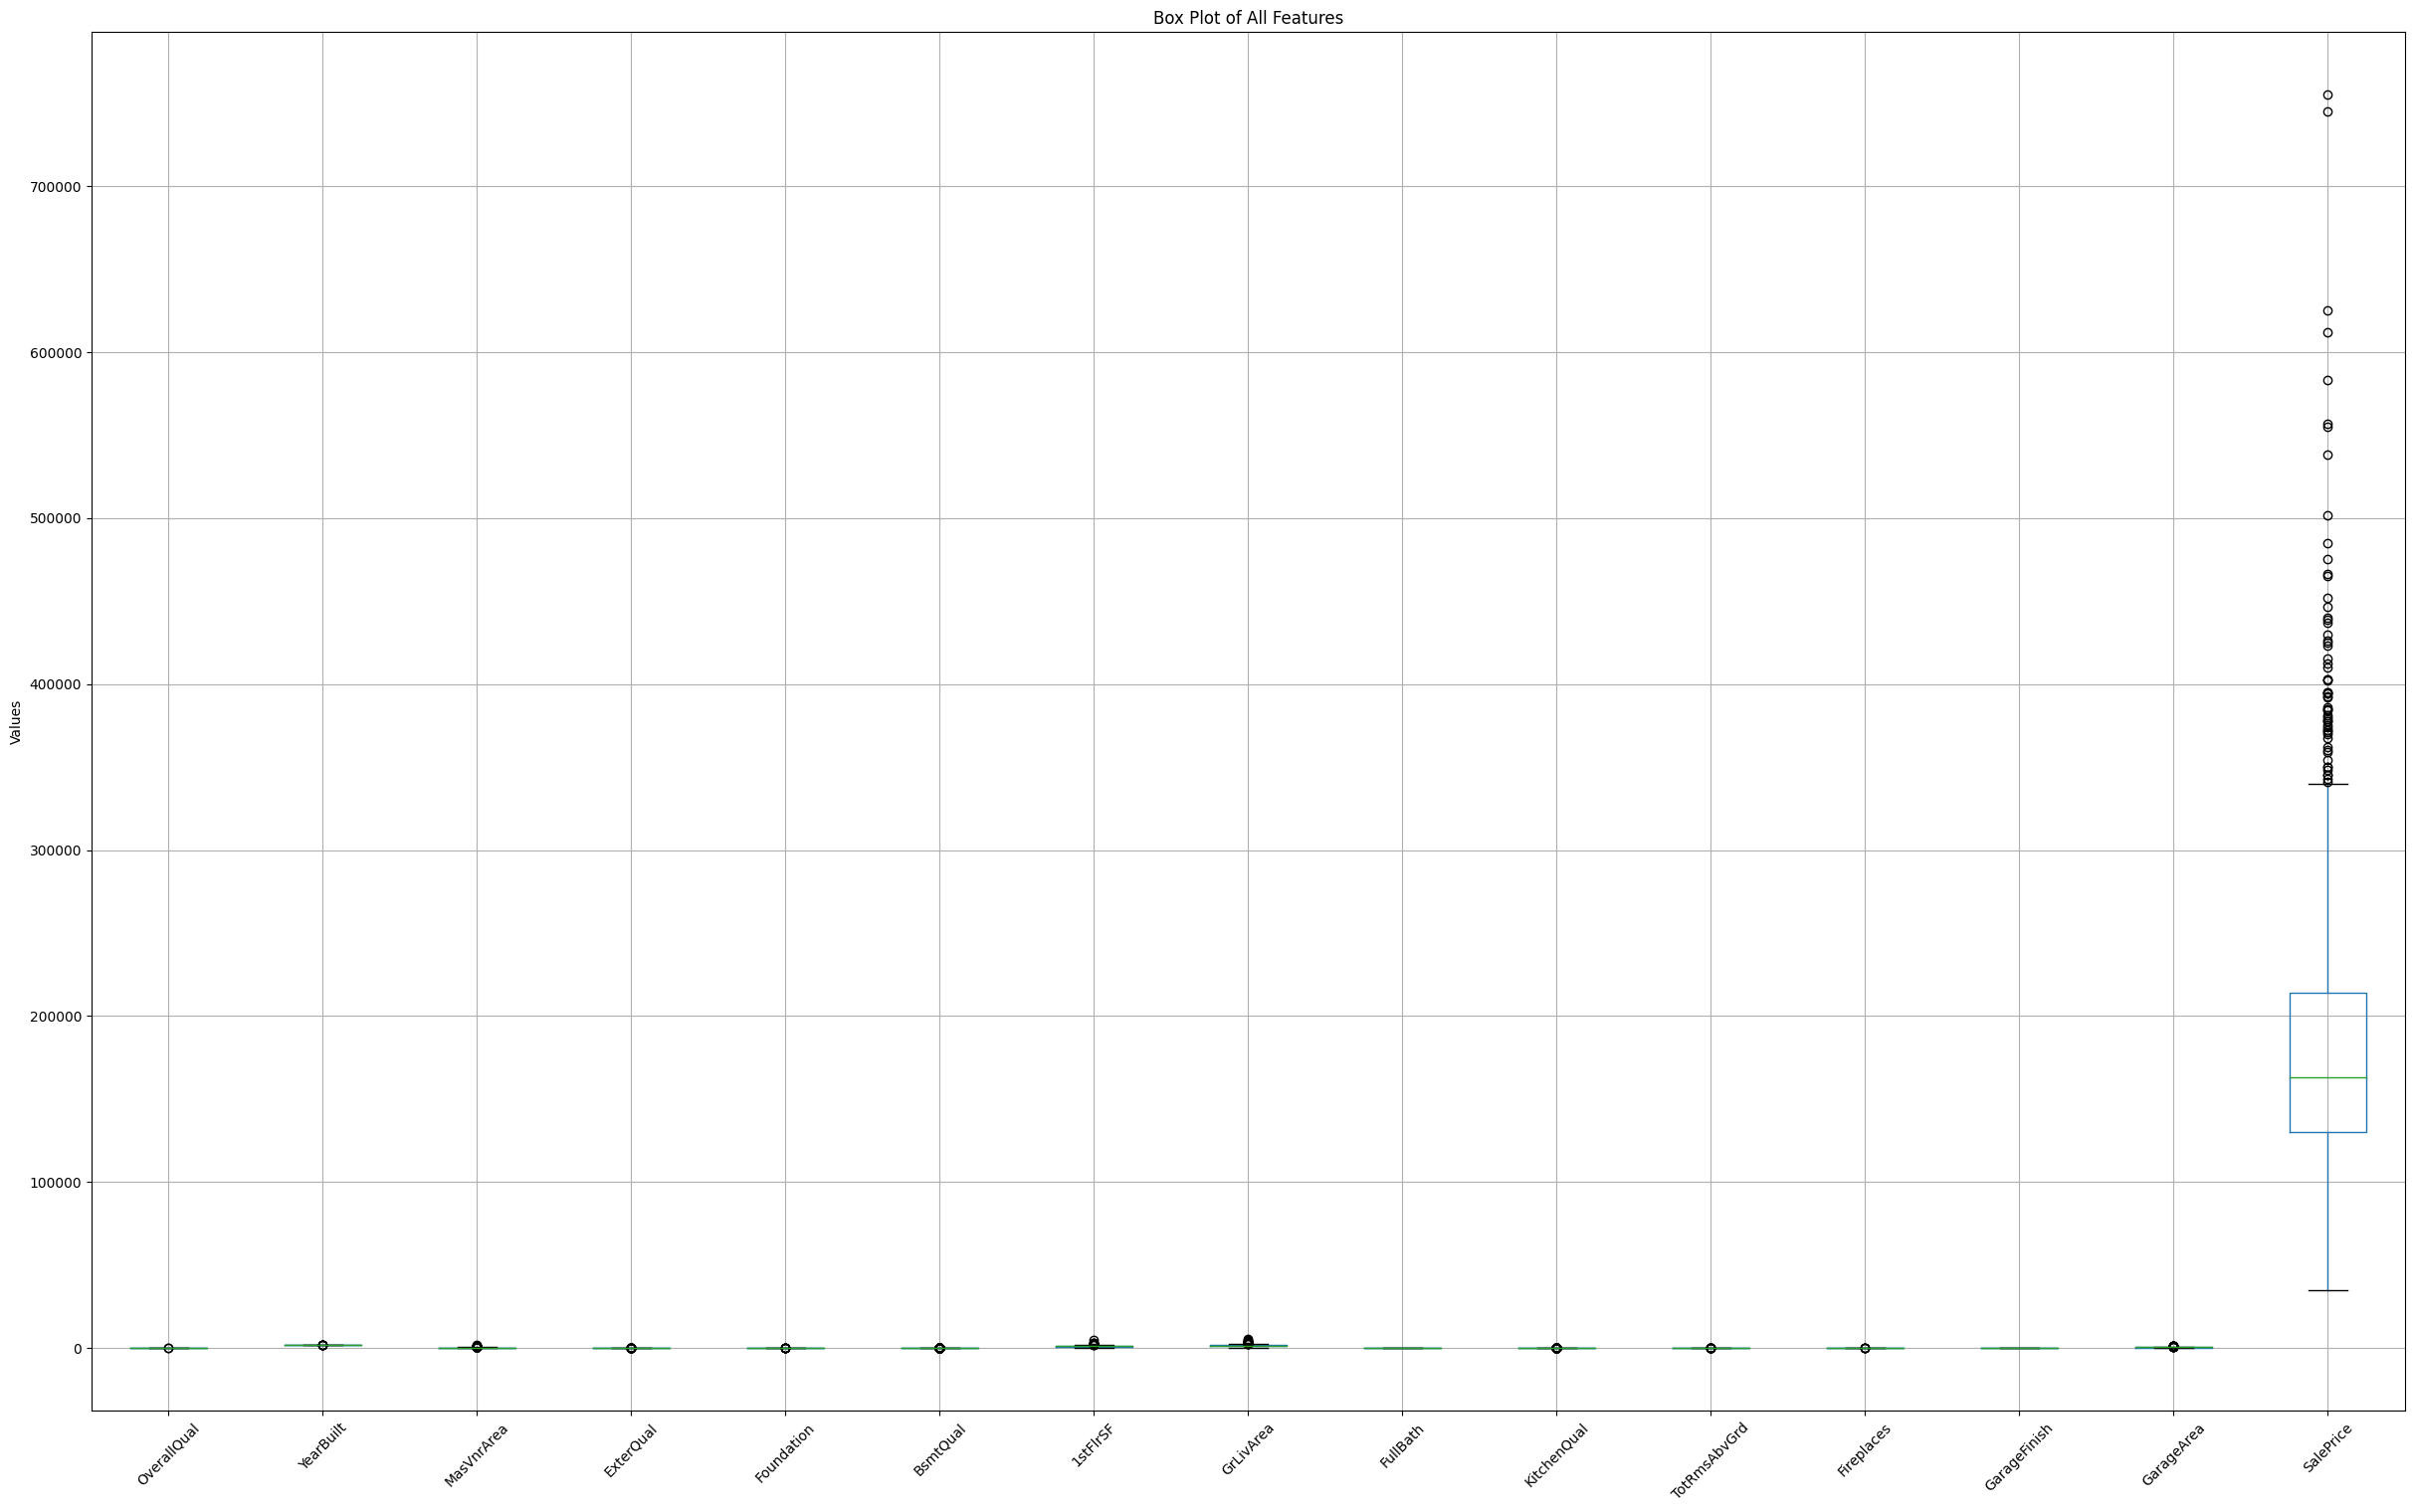

In [33]:


plt.figure(figsize=(30, 18))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

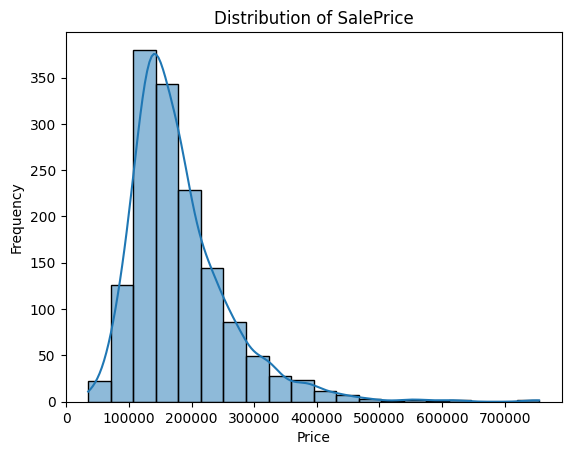

In [34]:
sns.histplot(data=data, x='SalePrice', bins=20, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

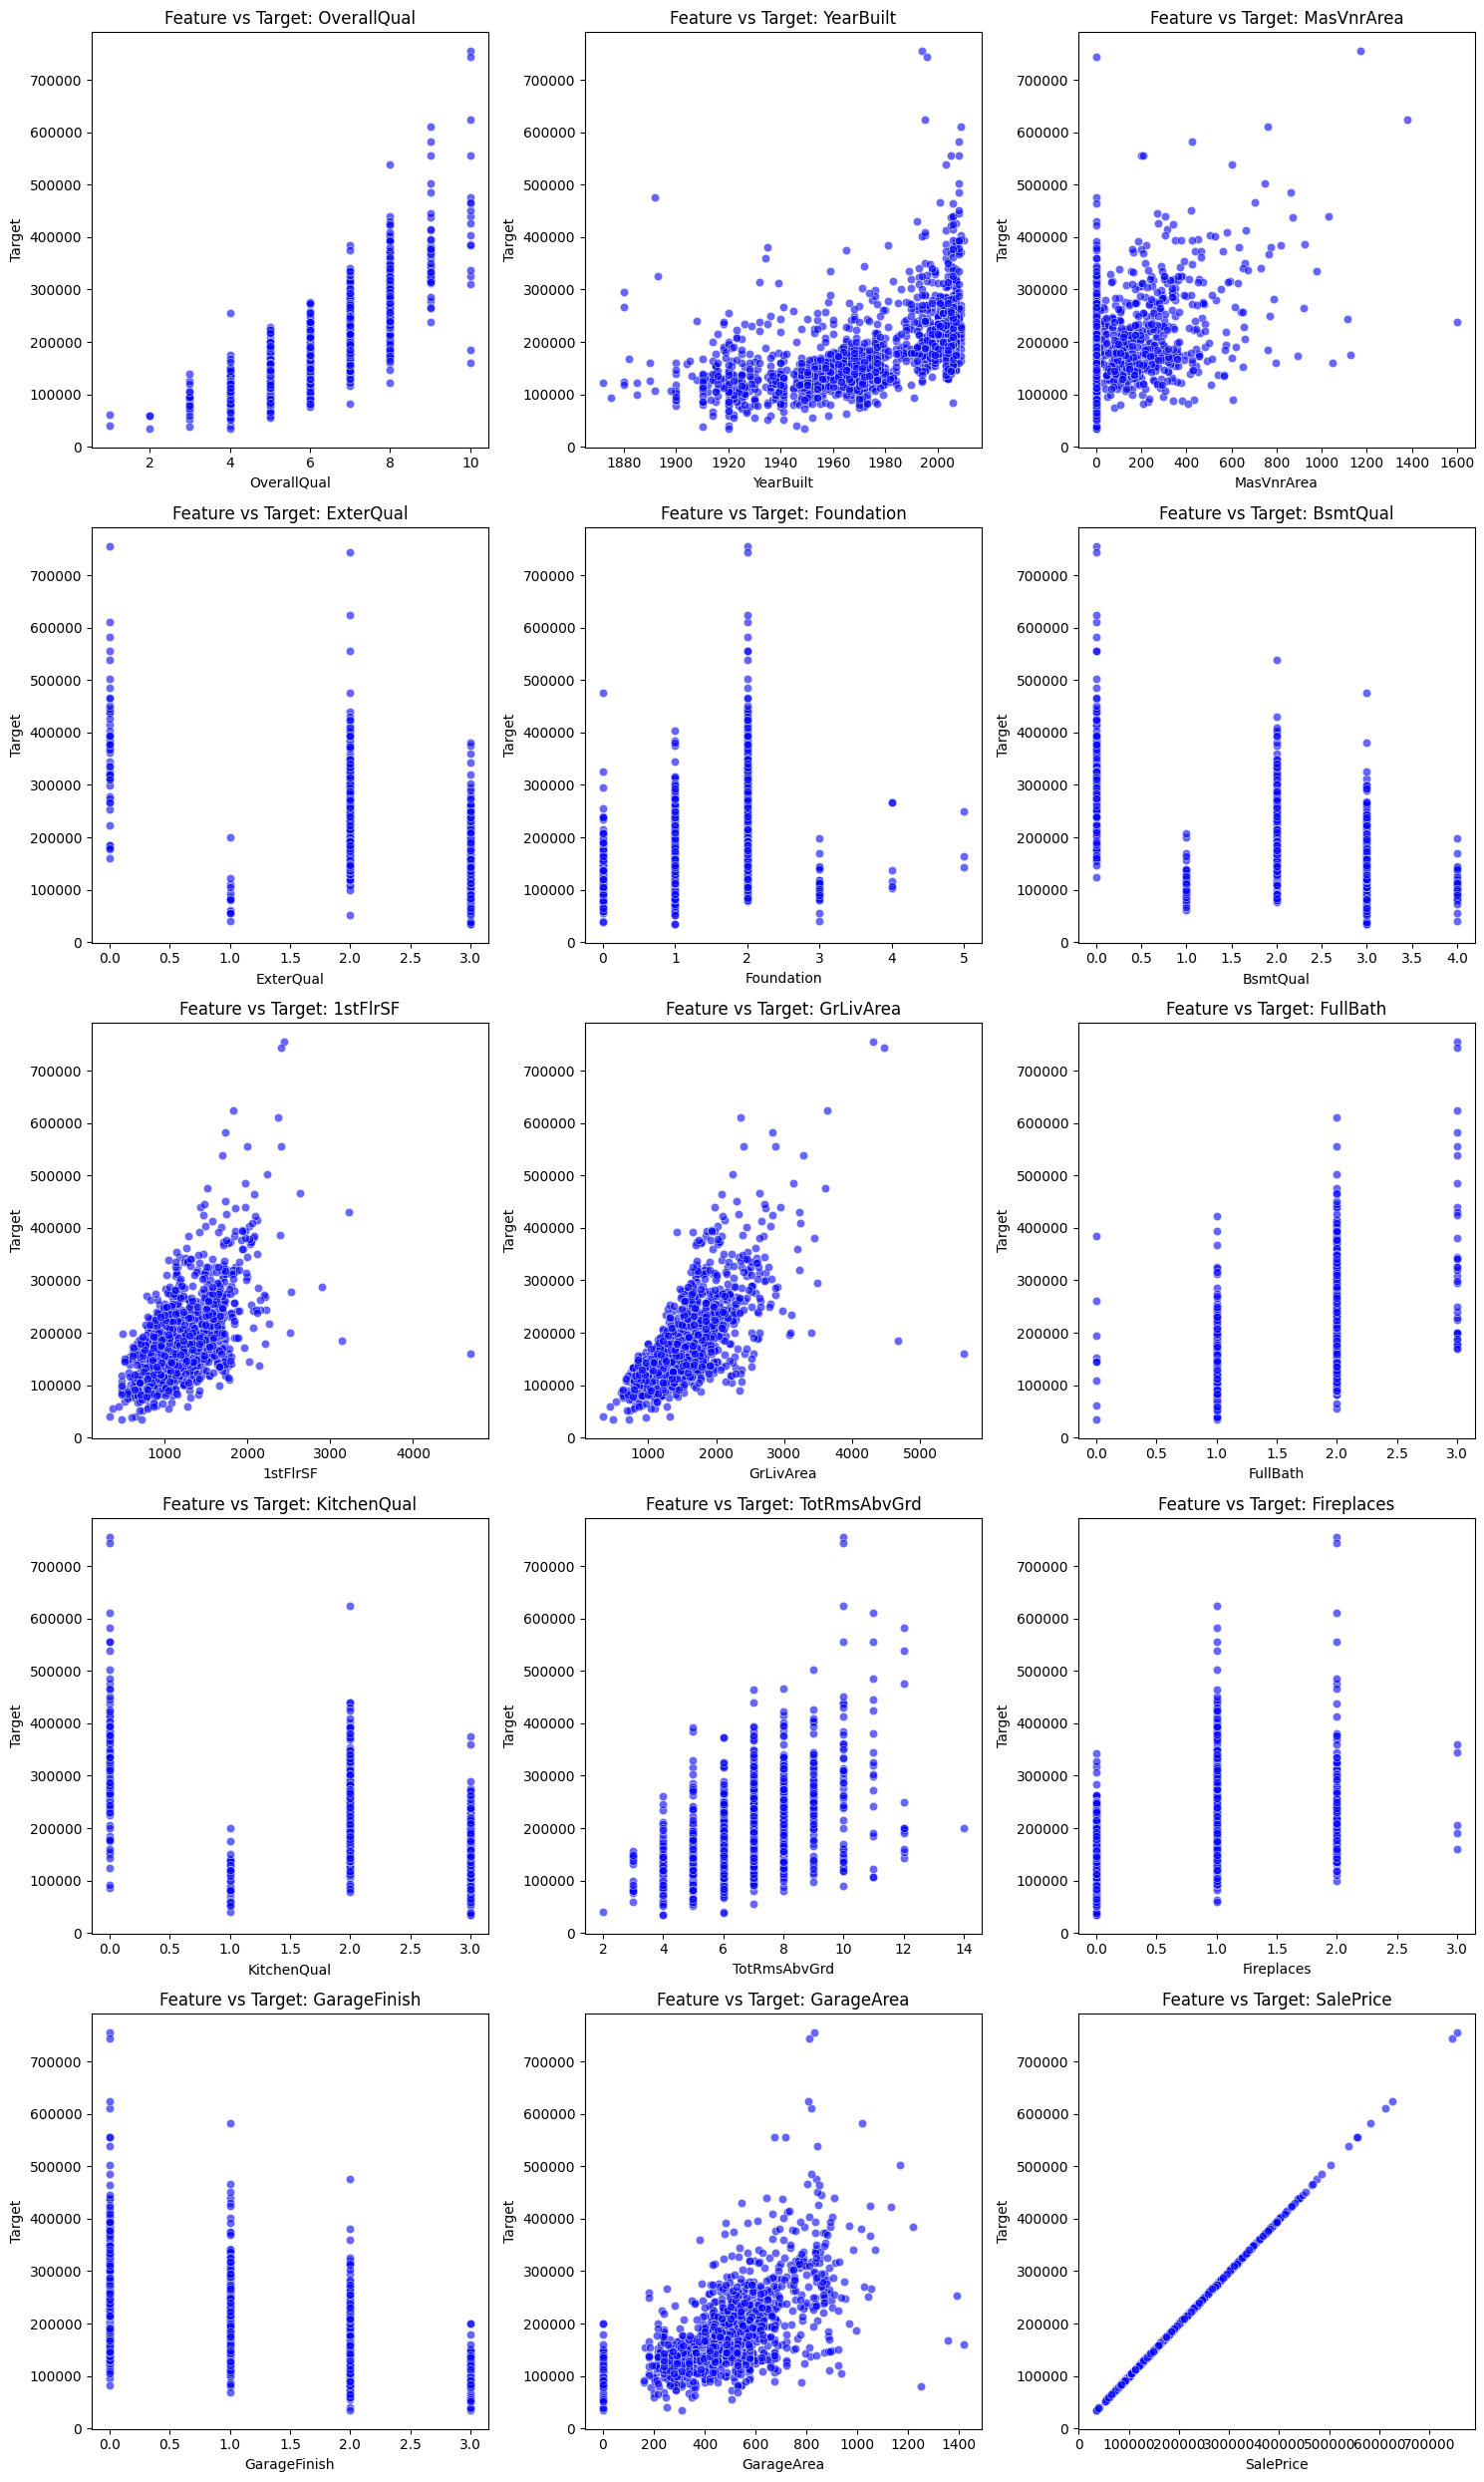

In [35]:
features = data.columns  

num_features = len(features)
num_cols = 3  
num_rows = (num_features + num_cols - 1) // num_cols  

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.scatterplot(x=data[feature], y=data['SalePrice'], color='blue', alpha=0.6)
    
    plt.title(f'Feature vs Target: {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Target')

plt.tight_layout()

plt.show()

In [36]:
X = data.drop(columns='SalePrice',axis=1)
Y = data['SalePrice']
y = np.log1p(data['SalePrice'])

In [37]:
X_test = data2

In [38]:
print(f"X_train shape: {X.shape}")
print(f"y_train shape: {Y.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1460, 14)
y_train shape: (1460,)
X_test shape: (1459, 14)


In [39]:
regression = LinearRegression()
regression.fit(X,Y)

LinearRegression()

In [40]:
r2S = regression.score(X,Y)
r2S

0.8023769138515393

In [41]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [42]:
r2S1 = model.score(X,y)
r2S1

0.8236302894640883

In [43]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = np.log1p(data[['SalePrice']])

x_train_scaled = scaler_x.fit_transform(X)
x_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train).ravel()

In [44]:
model2 = LinearRegression()
model2.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [45]:
r2 = model2.score(x_train_scaled,y_train_scaled)
r2

0.8236302894640882

In [46]:
q1  = data.quantile(0.25)
q3  = data.quantile(0.75)

IQR = q3 - q1

data_cleaned = data[~((data < (q1 - 1.5 * IQR)) | (data > (q3 + 1.5 * IQR))).any(axis=1)]

data_cleaned

OverallQual  YearBuilt  MasVnrArea  ExterQual  Foundation  BsmtQual  \
0               7       2003       196.0          2           2         2   
1               6       1976         0.0          3           1         2   
2               7       2001       162.0          2           2         2   
3               7       1915         0.0          3           0         3   
4               8       2000       350.0          2           2         2   
...           ...        ...         ...        ...         ...       ...   
1454            7       2004         0.0          2           2         2   
1455            6       1999         0.0          3           2         2   
1456            6       1978       119.0          3           1         2   
1458            5       1950         0.0          3           1         3   
1459            5       1965         0.0          2           1         3   

      1stFlrSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0          856       1710         2            2             8           0   
1         1262       1262         2            3             6           1   
2          920       1786         2            2             6           1   
3          961       1717         1            2             7           1   
4         1145       2198         2            2             9           1   
...        ...        ...       ...          ...           ...         ...   
1454      1221       1221         2            2             6           0   
1455       953       1647         2            3             7           1   
1456      2073       2073         2            3             7           2   
1458      1078       1078         1            2             5           0   
1459      1256       1256         1            3             6           0   

      GarageFinish  GarageArea  SalePrice  
0                1         548     208500  
1                1         460     181500  
2                1         608     223500  
3                2         642     140000  
4                1         836     250000  
...            ...         ...        ...  
1454             1         400     185000  
1455             1         460     175000  
1456             2         500     210000  
1458             2         240     142125  
1459             0         276     147500  

[1184 rows x 15 columns]

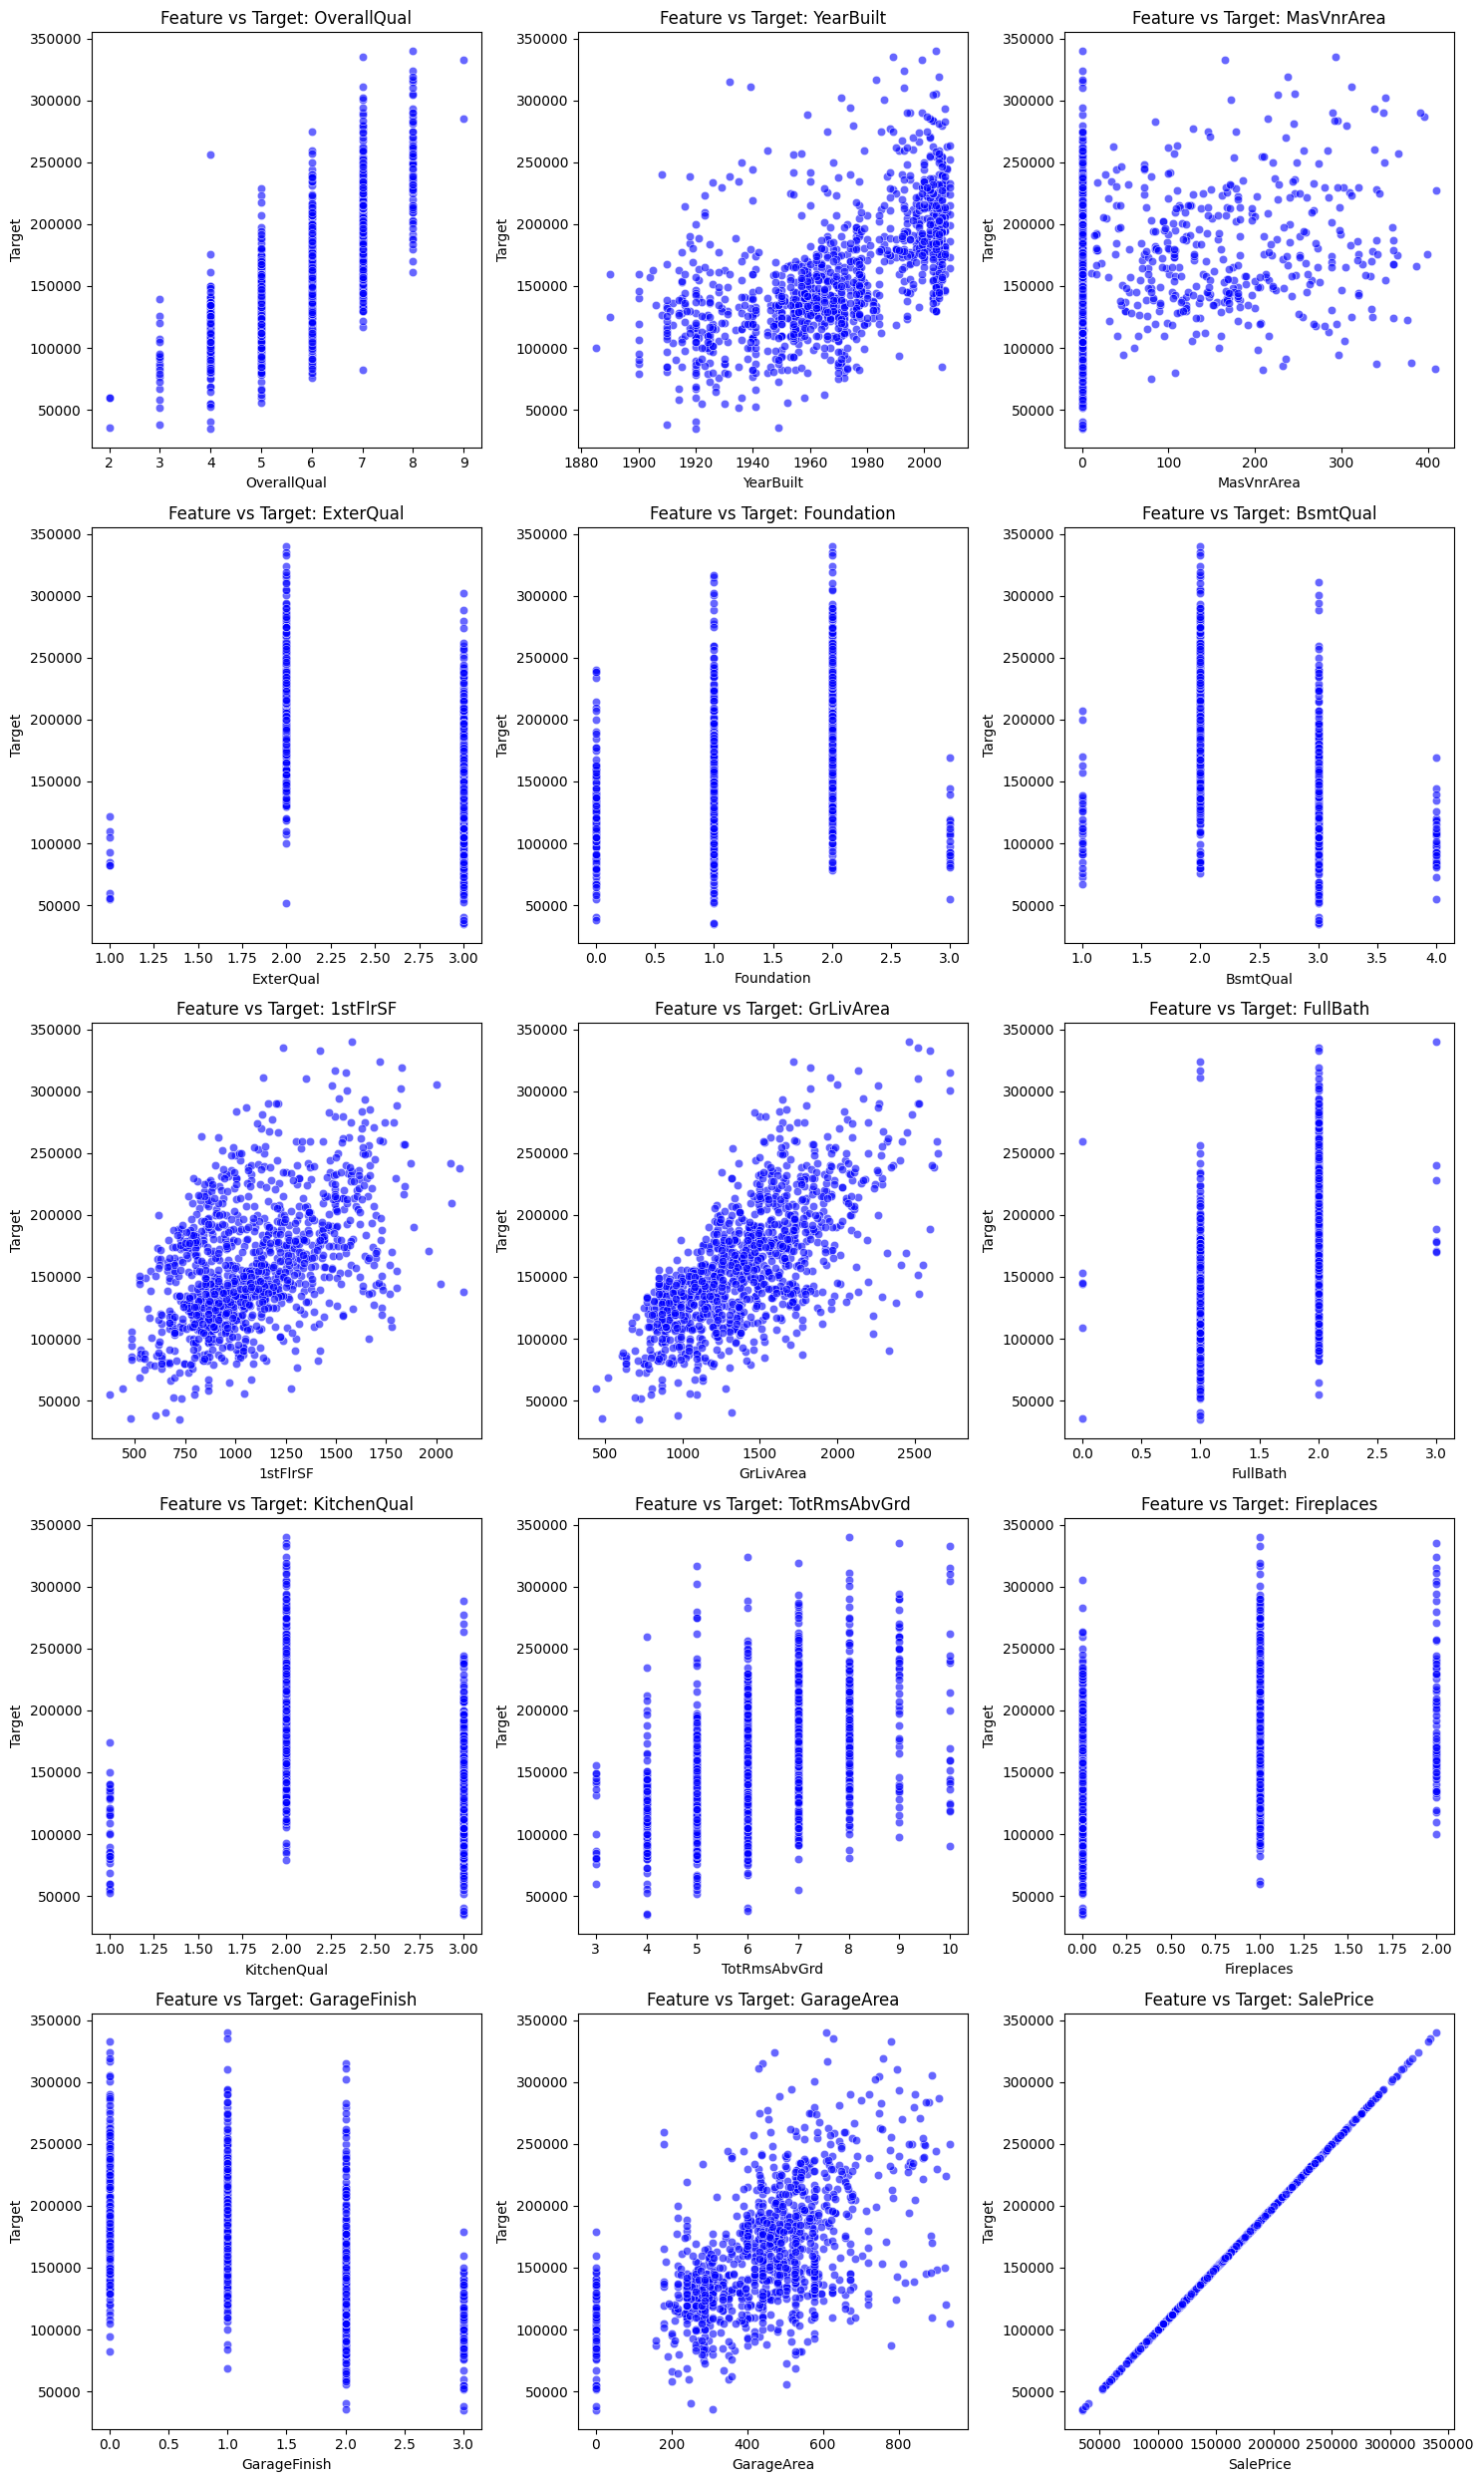

In [47]:
features = data_cleaned.columns  

num_features = len(features)
num_cols = 3  
num_rows = (num_features + num_cols - 1) // num_cols  

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.scatterplot(x=data_cleaned[feature], y=data_cleaned['SalePrice'], color='blue', alpha=0.6)
    
    plt.title(f'Feature vs Target: {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Target')

plt.tight_layout()

plt.show()

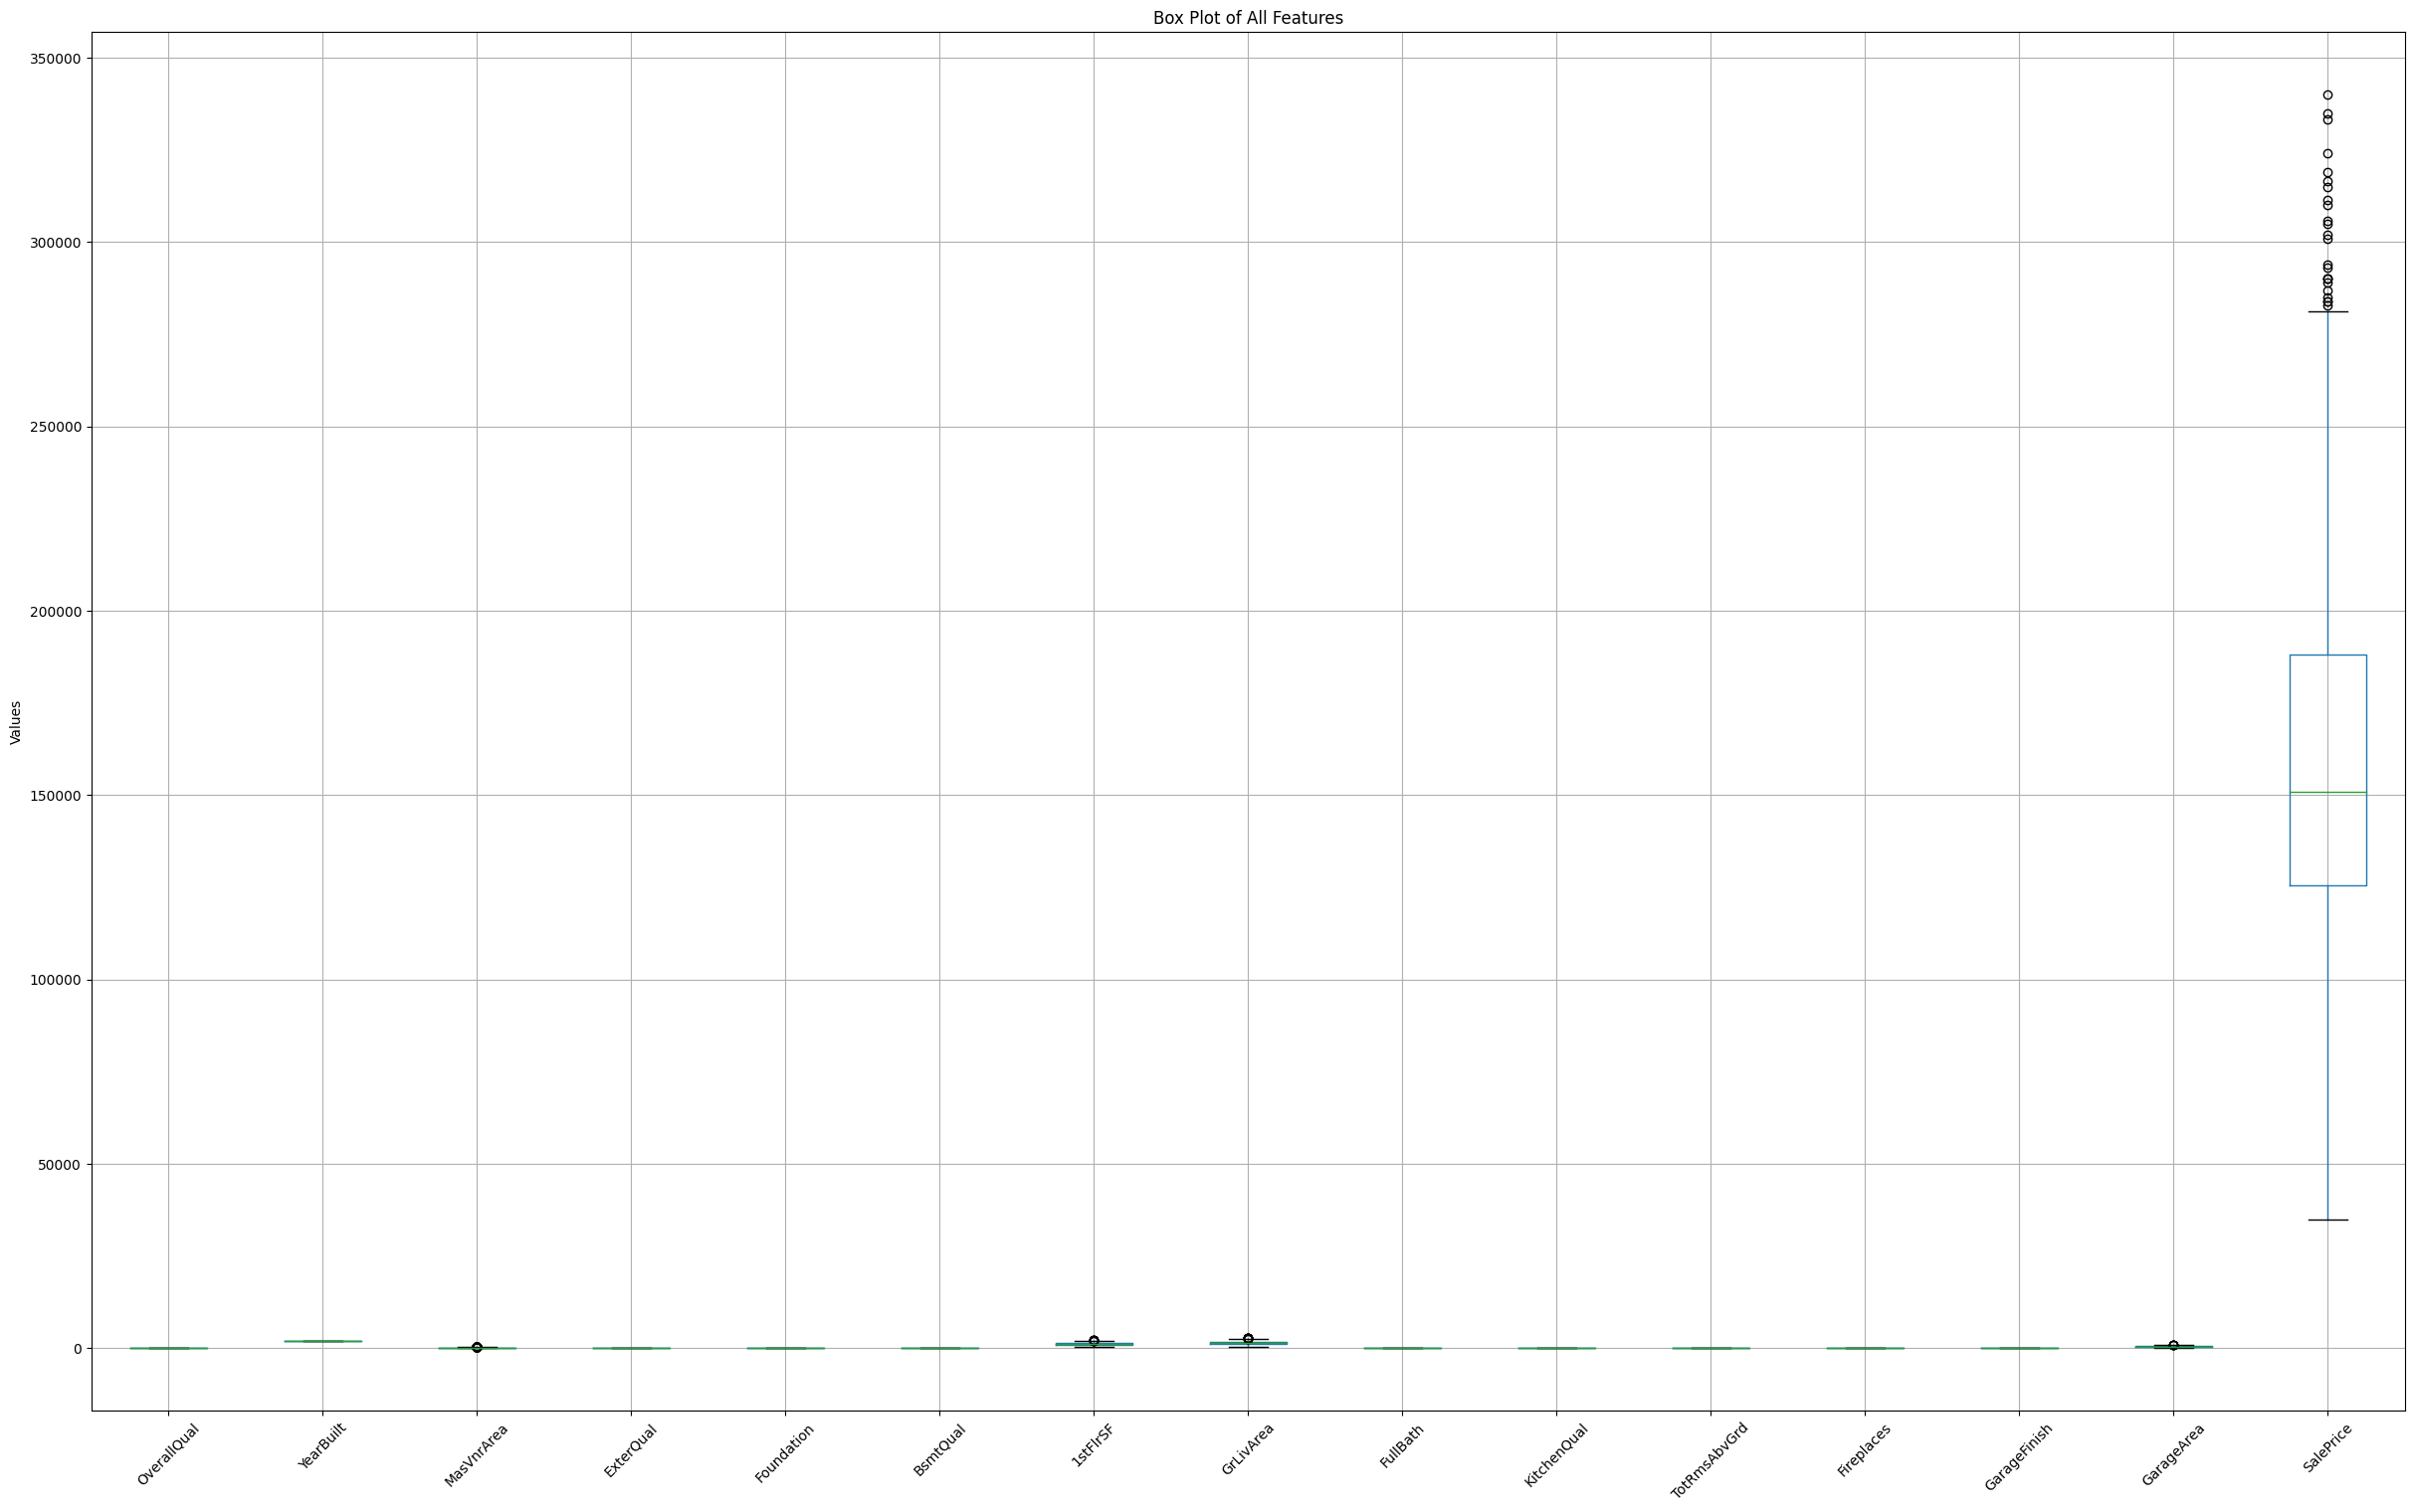

In [49]:

plt.figure(figsize=(30, 18))  
data_cleaned.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

In [55]:
X = data_cleaned.drop(columns='SalePrice',axis=1)
Y = data_cleaned['SalePrice']
y = np.log1p(data_cleaned['SalePrice'])

In [56]:
model3 = LinearRegression()
model3.fit(X,Y)

LinearRegression()

In [57]:
r = model3.score(X,Y)
r

0.7988847553889704

In [61]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = data_cleaned[['SalePrice']]

x_train_scaled = scaler_x.fit_transform(X)
x_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train).ravel()

In [62]:
model4 = LinearRegression()
model4.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [63]:
r = model4.score(x_train_scaled,y_train_scaled)
r

0.7988847553889704

In [69]:
X_train = data[['OverallQual']]
Y_train = np.log1p(data['SalePrice'])

simple = LinearRegression()
simple.fit(X_train,Y_train)

LinearRegression()

In [70]:
r = simple.score(X_train,Y_train)
r

0.6677906941538848